In [32]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable


epoch   0 / 100  : 34.025921   0.055609
epoch   5 / 100  : 25.665331   0.311301
epoch   10 / 100  : 19.359049   0.533369
epoch   15 / 100  : 14.602288   0.726235
epoch   20 / 100  : 11.014324   0.893739
epoch   25 / 100  : 8.307969   1.039215
epoch   30 / 100  : 6.266597   1.165561
epoch   35 / 100  : 4.726818   1.275292
epoch   40 / 100  : 3.565378   1.370593
epoch   45 / 100  : 2.689321   1.453362
epoch   50 / 100  : 2.028522   1.525246
epoch   55 / 100  : 1.530090   1.587677
epoch   60 / 100  : 1.154128   1.641899
epoch   65 / 100  : 0.870544   1.688990
epoch   70 / 100  : 0.656640   1.729889
epoch   75 / 100  : 0.495295   1.765409
epoch   80 / 100  : 0.373595   1.796259
epoch   85 / 100  : 0.281798   1.823051
epoch   90 / 100  : 0.212556   1.846321
epoch   95 / 100  : 0.160329   1.866530


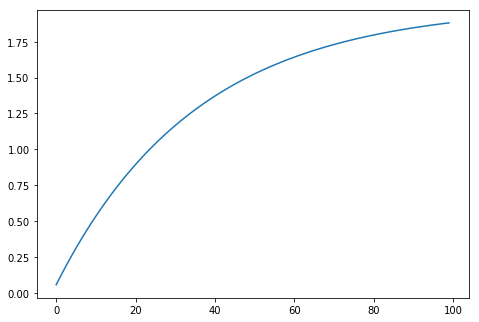

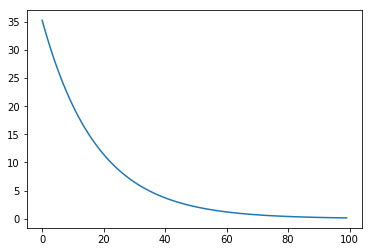

In [76]:
#w=0.0
w=Variable(torch.tensor([0.0]),requires_grad=True)
epochs=100
lr=0.001 #learning rate
x_data=[1.0,2.0,3.0]
y_data=[2.0,4.0,6.0]


def forward(x):  # all function that have w (Variable) create computation graph
    return w*x
def loss(x,y):
    y_pred=forward(x)
    return (y-y_pred)**2.0
def gradient(x,y):
    return 2.0*(y-forward(x))*x*-1.0   #this will be replaced with backward
    

loss__=torch.tensor([])   #[]
w__=torch.tensor([])   #[]

fig= plt.figure()

axes= fig.add_axes([0,0,1,1])

for epoch in range(epochs):
    
    for i,(x,y) in enumerate(zip(x_data,y_data)): #some thing like stochstic, not whole vector at once
        
        loss_=loss(x,y)
        loss_.backward()                 #this will calculate gradient of all Varibles wih grad on
        w.data=w.data-lr*w.grad.data
        #w=w-lr*gradient(x,y)
        w.grad.data.zero_()             #initialize gradients to zero other wise accumulate RNN (if umcooment sinusoidal)
    if (epoch%5==0): print("epoch   %d / %d  : %f   %f" %(epoch,epochs,loss(x,y),w.data))
    
   # print(w.data) w and w/o [0] just similar array or element here
   # print(w.data[0])
   # print(loss_.data)
   # print(loss_)
    loss__=torch.cat((loss__,loss_),0)
    w__=torch.cat((w__,w.data),0)
    #torch.cat((w.data[0]))
#     w_.append(w)
    #xx=np.arange(0,6,1)
    #yy=xx*w
    #axes.plot(xx,yy,linewidth=w/1.0,color='blue')
    

plt.plot(np.arange(0,epochs,1),w__.detach().numpy())   #need to detach gradient for graph breakdown otherwise won't do numpy in the middle of graph (good for end of run)
plt.show()    
plt.plot(np.arange(0,epochs,1),loss__.detach().numpy())
plt.show()
    
    
    
    
    
    
    
    
    
    

In [53]:
10%5

0